<a href="https://www.kaggle.com/code/abdelazizsami/project-uncovering-the-world-s-oldest-businesses?scriptVersionId=198407913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

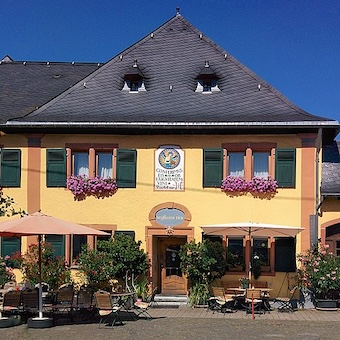

[`Staffelter Hof Winery is Germany's oldest business, established in 862 under the Carolingian dynasty. It has continued to serve customers through dramatic changes in Europe, such as the Holy Roman Empire, the Ottoman Empire, and both world wars. What characteristics enable a business to stand the test of time?

To help answer this question, BusinessFinancing.co.uk researched the oldest company still in business in **almost** every country and compiled the results into several CSV files. This dataset has been cleaned.

Having useful information in different files is a common problem. While it's better to keep different types of data separate for data storage, you'll want all the data in one place for analysis. You'll use joining and data manipulation to work with this data and better understand the world's oldest businesses.

## The Data
`data/businesses.csv` and `data/new_businesses.csv`
|Column|Description|
|------|-----------|
|`business`|Name of the business (varchar)|
|`year_founded`|Year the business was founded (int)|
|`category_code`|Code for the business category (varchar)|
|`country_code`|ISO 3166-1 three-letter country code (char)|

`data/countries.csv`
|Column|Description|
|------|-----------|
|`country_code`|ISO 3166-1 three-letter country code (varchar)|
|`country`|Name of the country (varchar)|
|`continent`|Name of the continent the country exists in (varchar)|

`data/categories.csv`
|Column|Description|
|------|-----------|
|`category_code`|Code for the business category (varchar)|
|`category`|Description of the business category (varchar)|`](url)

In [1]:
# Import necessary libraries
import pandas as pd

# Load the data
businesses = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/businesses.csv")
new_businesses = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/new_businesses.csv")
countries = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/countries.csv")
categories = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/categories.csv")

In [2]:
# Import necessary libraries
import pandas as pd

# Load the data
businesses = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/businesses.csv")
new_businesses = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/new_businesses.csv")
countries = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/countries.csv")
categories = pd.read_csv("/kaggle/input/uncovering-the-worlds-oldest-businesses/categories.csv")

# What is the oldest business on every continent?

# Start by merging the businesses and countries datasets into one
businesses_countries = businesses.merge(countries, on="country_code")

# Create a new DataFrame that lists only the continent and oldest year_founded
continent = businesses_countries.groupby("continent").agg({"year_founded":"min"})

# Merge this continent DataFrame with businesses_countries
merged_continent = continent.merge(businesses_countries, on=["continent", "year_founded"])

# Subset the continent DataFrame so that only the four columns of interest are included, saving it as oldest_business_continent
oldest_business_continent = merged_continent[["continent", "country", "business", "year_founded"]]

# View the result
print(oldest_business_continent)

# How many countries per continent lack data on the oldest businesses? 
# Does including the `new_businesses` data change this?

# Add the data in new_businesses to the existing businesses
all_businesses = pd.concat([new_businesses, businesses])

# Perform a new merge between the businesses and the countries data. Use additional parameters this time to perform an outer merge and create an indicator column to better see the missing values. An outer merge combines two DataFrames based on a key column and includes all rows from both DataFrames
new_all_countries = all_businesses.merge(countries, on="country_code", how="outer",  indicator=True)

# Filter to find countries with missing business data
new_missing_countries = new_all_countries[new_all_countries["_merge"] != "both"]

# Group by continent and create a "count_missing" column
count_missing = new_missing_countries.groupby("continent").agg({"country":"count"})
count_missing.columns = ["count_missing"]

# View the results
print(count_missing)

# Which business categories are best suited to last over the course of centuries?

# Start by merging the businesses and categories data into one DataFrame
businesses_categories = businesses.merge(categories, on="category_code")

# Merge all businesses, countries, and categories together
businesses_categories_countries = businesses_categories.merge(countries, on="country_code")

# Create the oldest by continent and category DataFrame
oldest_by_continent_category = businesses_categories_countries.groupby(["continent", "category"]).agg({"year_founded":"min"})
oldest_by_continent_category.head()

       continent    country                     business  year_founded
0         Africa  Mauritius               Mauritius Post          1772
1           Asia      Japan                   Kongō Gumi           578
2         Europe    Austria  St. Peter Stifts Kulinarium           803
3  North America     Mexico  La Casa de Moneda de México          1534
4        Oceania  Australia               Australia Post          1809
5  South America       Peru      Casa Nacional de Moneda          1565
               count_missing
continent                   
Africa                     3
Asia                       7
Europe                     2
North America              5
Oceania                   10
South America              3


year_founded
continent category                                       
Africa    Agriculture                                1947
          Aviation & Transport                       1854
          Banking & Finance                          1892
          Distillers, Vintners, & Breweries          1933
          Energy                                     1968